In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xlrd
import csv

In [25]:
# Caminho do seu arquivo Excel (.xlsx)
excel_file = '../tabela1.xlsx'  # ou o caminho correto no seu sistema

# Lê todas as abas (retorna um dicionário: {nome_aba: dataframe})
xls = pd.read_excel(excel_file, sheet_name=None)

# Loop para salvar cada aba em um arquivo CSV separado
for sheet_name, df in xls.items():
    # Cria um nome de arquivo com base no nome da aba
    safe_name = sheet_name.replace(' ', '_').replace('/', '-')  # evita caracteres problemáticos
    output_csv = f"{safe_name}.csv"
    
    # Salva o DataFrame em um CSV
    df.to_csv(output_csv, index=False)
    
    print(f"Aba '{sheet_name}' salva como '{output_csv}'")

Aba 'Brasil e GR' salva como 'Brasil_e_GR.csv'
Aba 'Brasil e Norte' salva como 'Brasil_e_Norte.csv'
Aba 'Brasil e Nordeste 1' salva como 'Brasil_e_Nordeste_1.csv'
Aba 'Brasil e Nordeste 2' salva como 'Brasil_e_Nordeste_2.csv'
Aba 'Brasil e Sudeste' salva como 'Brasil_e_Sudeste.csv'
Aba 'Brasil e Sul' salva como 'Brasil_e_Sul.csv'
Aba 'Brasil e Centro-Oeste' salva como 'Brasil_e_Centro-Oeste.csv'


In [48]:
df1 = pd.read_csv("Brasil_e_Centro-Oeste.csv")
df

,Indicador,Nível Territorial,Abertura Territorial,Variável de abertura,Categoria,Variável de abertura .1,Categoria .1,2016,2017,2018
0,População (mil pessoas),País,Brasil,Sexo,Total,Grupos de idade,Total,204325.47,205999.691,207651.621
1,População (mil pessoas),País,Brasil,Sexo,Total,Grupos de idade,0 a 3 anos,10223.229,10141.908,10171.730
2,População (mil pessoas),País,Brasil,Sexo,Total,Grupos de idade,4 e 5 anos,5262.563,5268.945,5350.024
3,População (mil pessoas),País,Brasil,Sexo,Total,Grupos de idade,6 a 9 anos,11100.37,10962.806,10947.352
4,População (mil pessoas),País,Brasil,Sexo,Total,Grupos de idade,10 a 14 anos,15445.672,15363.81,15023.146
...,...,...,...,...,...,...,...,...,...,...
31075,CV - Distribuição das pessoas de 15 a 29 anos (%),Capital,Brasília,Cor ou raça,Preta ou parda,Condição de estudo e situação na ocupação,Total,0,0,0.000
31076,CV - Distribuição das pessoas de 15 a 29 anos (%),Capital,Brasília,Cor ou raça,Preta ou parda,Condição de estudo e situação na ocupação,Não ocupada e frequentando escola ou cursos pr...,4.5,4.2,4.500
31077,CV - Distribuição das pessoas de 15 a 29 anos (%),Capital,Brasília,Cor ou raça,Preta ou parda,Condição de estudo e situação na ocupação,"Ocupada e não frequentando escola, nem cursos ...",4.4,4.1,4.200
31078,CV - Distribuição das pessoas de 15 a 29 anos (%),Capital,Brasília,Cor ou raça,Preta ou parda,Condição de estudo e situação na ocupação,"Ocupada e frequentando escola, cursos pré-vest...",8.4,8,7.300


In [67]:
df_ages = df.loc[df["Variável de abertura .1"] == "Grupos de idade"].copy()
df_ages_brazil = df_ages.loc[df_ages["Categoria"] == "Total"]

KeyError: 'Categoria'

TypeError: unhashable type: 'numpy.ndarray'

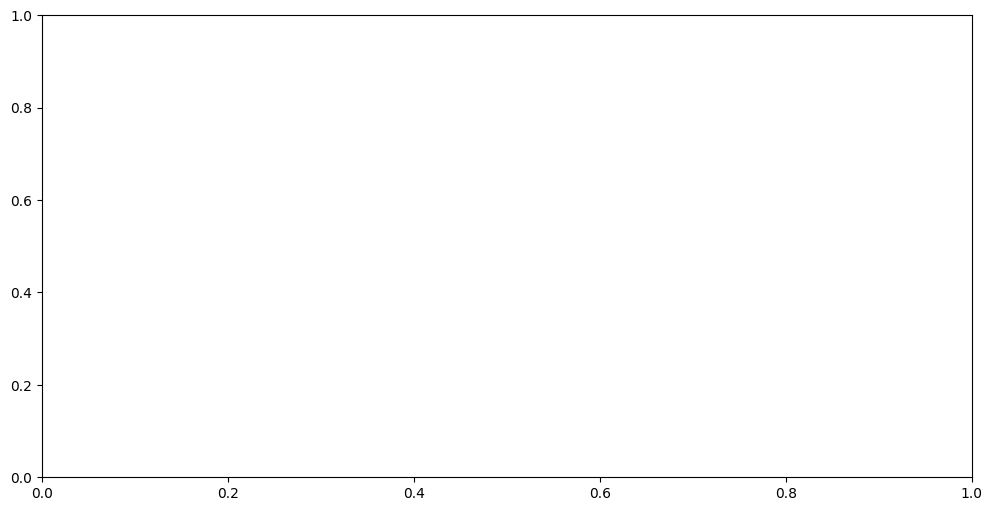

In [45]:
# Filtra apenas as linhas com grupos de idade
df_ages = df[df["Variável de abertura .1"] == "Grupos de idade"].copy()

# Remove a linha "Total" se estiver presente
df_ages = df_ages[df_ages["Categoria .1"] != "Total"]

# Seleciona colunas relevantes
# df_plot = df_idade[["Categoria .1", 2016, 2017, 2018]].copy()

# Obtém os grupos de idade únicos
# grupos_idade = (df_idade["Categoria .1"])

# Converte as colunas de ano para numérico
years = [2016, 2017, 2018]
df_ages[years] = df_ages[years].apply(pd.to_numeric, errors='coerce')

age_groups = df_ages["Categoria .1"].unique()

# Plotando diretamente sem transposição
plt.figure(figsize=(12, 6))

# # Iterando pelas linhas do DataFrame
for group in age_groups:
    data_group = df_ages[df_ages["Categoria .1"] == group]
    plt.plot(years, data_group, marker='o', label=group)

plt.title("População por Grupo de Idade (2016-2018)")
plt.xlabel("Ano")
plt.ylabel("População (mil pessoas)")
plt.legend(title="Grupo de idade", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Filtra apenas as linhas com grupos de idade
df_condicao_estudo = df[df["Variável de abertura .1"] == "Condição de estudo e situação na ocupação"]

# Remove a linha "Total" se estiver presente
df_condicao_estudo = df_condicao_estudo[df_condicao_estudo["Categoria .1"] != "Total"]

# Seleciona colunas relevantes
df_plot_1 = df_condicao_estudo[["Categoria .1", 2016, 2017, 2018]].copy()

# Converte as colunas de ano para numérico
df_plot_1[[2016, 2017, 2018]] = df_plot[[2016, 2017, 2018]].apply(pd.to_numeric, errors='coerce')

In [20]:
df_plot_1

,Categoria .1,2016,2017,2018
3053,Não ocupada e frequentando escola ou cursos pr...,NaN,NaN,NaN
3054,"Ocupada e não frequentando escola, nem cursos ...",NaN,NaN,NaN
3055,"Ocupada e frequentando escola, cursos pré-vest...",NaN,NaN,NaN
3056,"Não ocupada e não frequentando escola, nem cur...",NaN,NaN,NaN
3058,Não ocupada e frequentando escola ou cursos pr...,NaN,NaN,NaN
...,...,...,...,...
31074,"Não ocupada e não frequentando escola, nem cur...",NaN,NaN,NaN
31076,Não ocupada e frequentando escola ou cursos pr...,NaN,NaN,NaN
31077,"Ocupada e não frequentando escola, nem cursos ...",NaN,NaN,NaN
31078,"Ocupada e frequentando escola, cursos pré-vest...",NaN,NaN,NaN
